# Building the design matrix (WMH - Fazekas)

In [4]:
%run /home/grg/git/alfa/nilearn-helper.py
%run /home/grg/git/alfa/build_matrix.py
%matplotlib inline

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
fp = '/home/grg/spm/data/subjects_dartel.json'
subjects = json.load(open(fp))
images = []
wd = '/home/grg/dartel_csf.5/'
subjects2 = []
for s in subjects:
    try:
        fp = glob(osp.join(wd, 'rswr%s*.nii'%s))[0]
        images.append(fp)
        subjects2.append(s)
    except:
        print s, 'not found'
subjects = subjects2
images

10239 not found
11257 not found
21057 not found
10333 not found
11481 not found
11778 not found
13019 not found


['/home/grg/dartel_csf.5/rswr10070_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/rswr10102_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/rswr10108_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/rswr10235_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/rswr10365_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/rswr10419_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/rswr10463_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/rswr10530_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/rswr10551_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/rswr10563_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/rswr10576_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/rswr10630_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/rswr10668_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/rswr10692_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/rswr10693_MD_t1space_wo_csf_nohdr.nii',
 '/home/grg/dartel_csf.5/

In [9]:
cov = pd.read_excel('/home/grg/spm/data/covariates.xls')
wmh = pd.read_excel('/tmp/White matter hyperintensities - Fazekas (GS).xlsx')
#cov['agesq'] = cov['age']**2
data = build_matrix(images, ['apo', 'age', 'educyears','gender'], cov, subjects=subjects)
data = build_dummy(data, 'apo')
#data = build_interaction(data, 'age', 'apo')
del data['apo']
#del data['agesq']
#data.head()
wmh.head()

,images,age,educyears,gender,0,1,2
0,/home/grg/dartel_csf.5/rswr10070_MD_t1space_wo...,50.781656,10,0,1,0,0
1,/home/grg/dartel_csf.5/rswr10102_MD_t1space_wo...,64.065708,18,1,1,0,0
2,/home/grg/dartel_csf.5/rswr10108_MD_t1space_wo...,58.683094,15,0,1,0,0
3,/home/grg/dartel_csf.5/rswr10235_MD_t1space_wo...,61.245722,8,0,1,0,0
4,/home/grg/dartel_csf.5/rswr10365_MD_t1space_wo...,48.720055,12,0,1,0,0


In [25]:
data.to_excel('/home/grg/spm/designmat/TBSS_MD_simplemodel_WMH.xls')

Analysis ready to be run.

In [42]:
paramtype = 'MD'
analysis_wd = '/home/grg/spm/analyses/analysis_20170407/TBSS_MD_simplemodel'
nodes = [pickle.load(gzip.open(osp.join(analysis_wd, e, '_node.pklz'), 'rb')) 
         for e in ['modeldesign', 'estimatemodel','estimatecontrasts']]
n1, n2, n3 = nodes
print 'Used mask:', n1.inputs.explicit_mask_file
print '# of scans included in the analysis:', len(n1.inputs.in_files), '(first one: %s)'%n1.inputs.in_files[0]
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Used mask: /home/grg/spm/TBSS_MD_skeletonized/mean_FA_skeleton_mask.nii
# of scans included in the analysis: 304 (first one: /home/grg/spm/TBSS_MD_skeletonized/0_10070.niiswap.nii)


,contrast name,contrast type,covariate names,covariate weights
0,Apo2-3>Apo2-4,T,"[Apoe2-3, Apoe2-4]","[1.0, -1.0]"
1,Apo2-4>Apo3-3,T,"[Apoe2-4, Apoe3-3]","[1.0, -1.0]"
2,Apo3-3>Apo3-4,T,"[Apoe3-3, Apoe3-4]","[1.0, -1.0]"
3,Apo3-4>Apo4-4,T,"[Apoe3-4, Apoe4-4]","[1.0, -1.0]"
4,Main effect ApoE,F,"[(Apo2-3>Apo2-4, T, [Apoe2-3, Apoe2-4], [1.0, ...",None
5,C<NC,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4]","[3.0, -2.0, 3.0, -2.0, -2.0]"
6,C>NC,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4]","[-3.0, 2.0, -3.0, 2.0, 2.0]"
7,HO<All,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4]","[1.0, 1.0, 1.0, 1.0, -4.0]"
8,HO>All,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4]","[-1.0, -1.0, -1.0, -1.0, 4.0]"
9,HO<HT,T,"[Apoe2-4, Apoe3-4, Apoe4-4]","[1.0, 1.0, -2.0]"


/home/grg/spm/analyses/analysis_20170407/TBSS_MD_simplemodel/estimatecontrasts/spmT_0006.nii T
Saving to... /tmp/tmpViDRfi.png
/home/grg/spm/analyses/analysis_20170407/TBSS_MD_simplemodel/estimatecontrasts/spmT_0008.nii T
Saving to... /tmp/tmpZRszKE.png
/home/grg/spm/analyses/analysis_20170407/TBSS_MD_simplemodel/estimatecontrasts/spmT_0010.nii T
Saving to... /tmp/tmpjAVO93.png
/home/grg/spm/analyses/analysis_20170407/TBSS_MD_simplemodel/estimatecontrasts/spmT_0012.nii T
Saving to... /tmp/tmpUcuhxf.png


[(u'C<NC', '/tmp/tmpViDRfi.png'),
 (u'HO<All', '/tmp/tmpZRszKE.png'),
 (u'HO<HT', '/tmp/tmpjAVO93.png'),
 (u'HO<NC', '/tmp/tmpUcuhxf.png')]

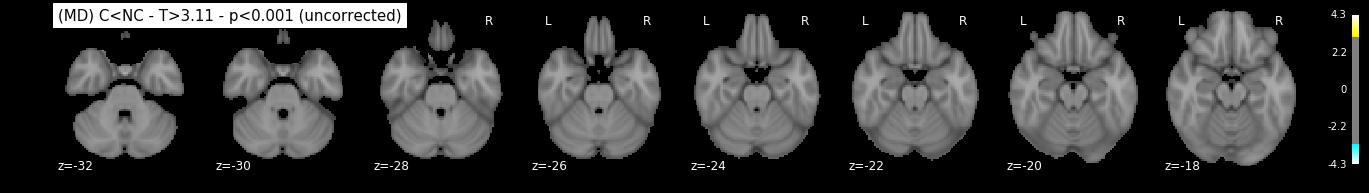

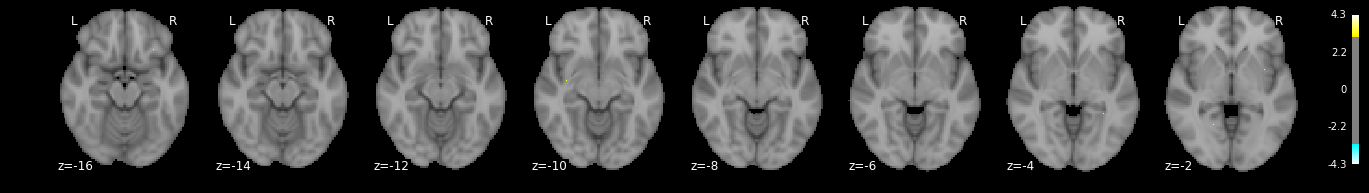

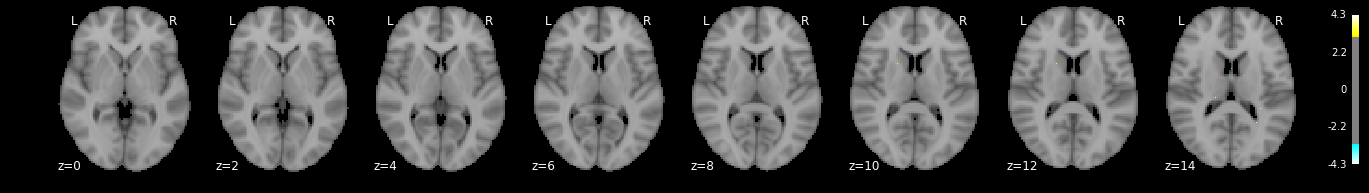

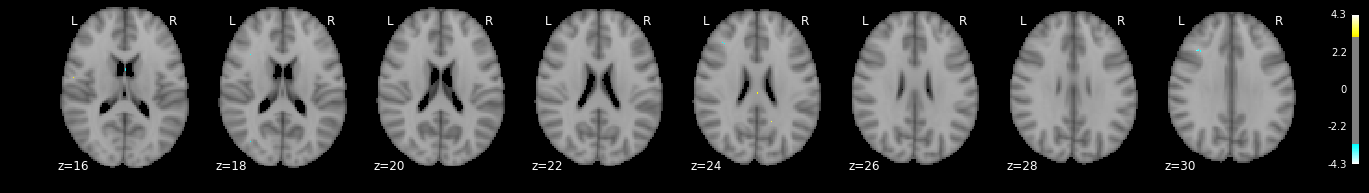

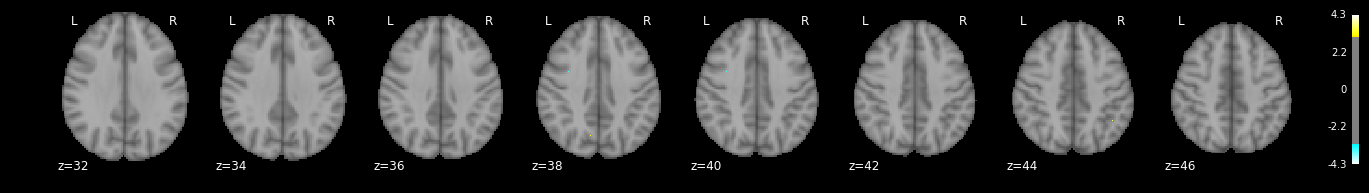

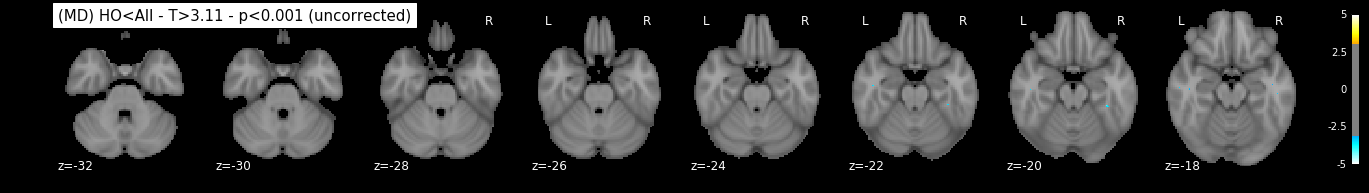

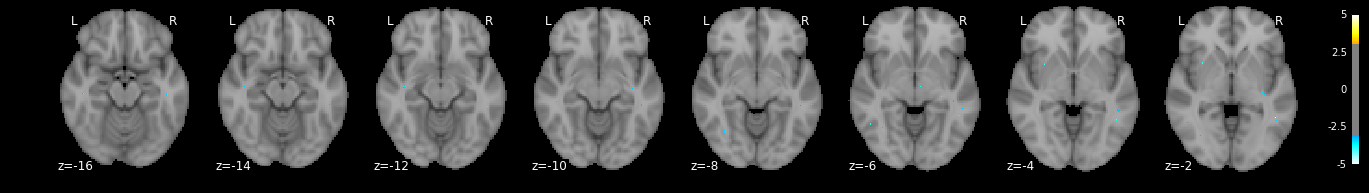

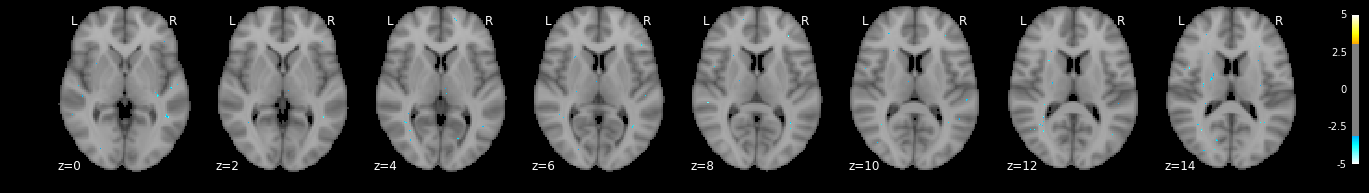

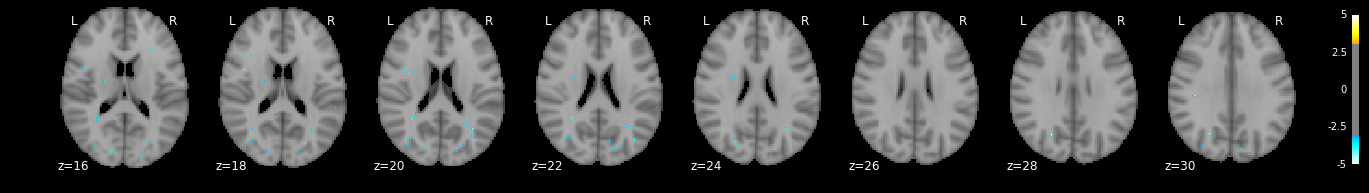

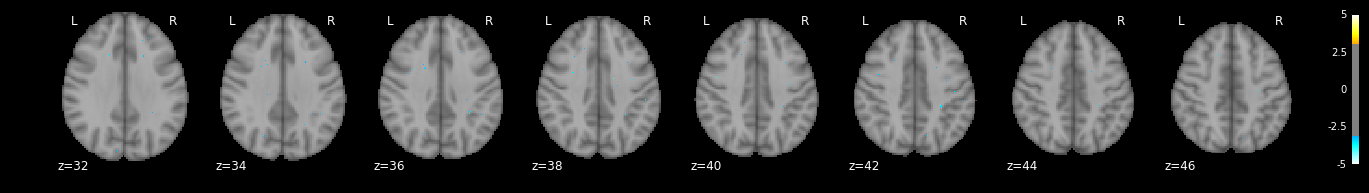

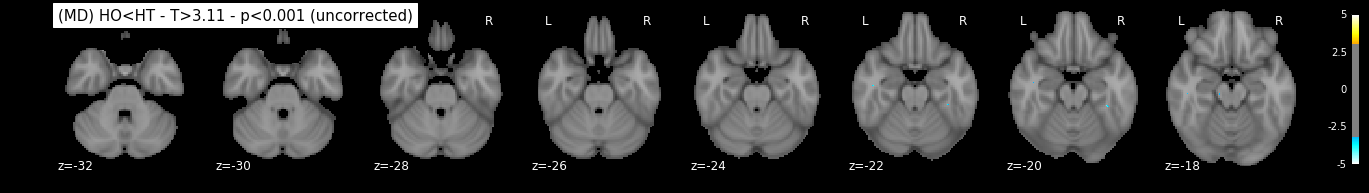

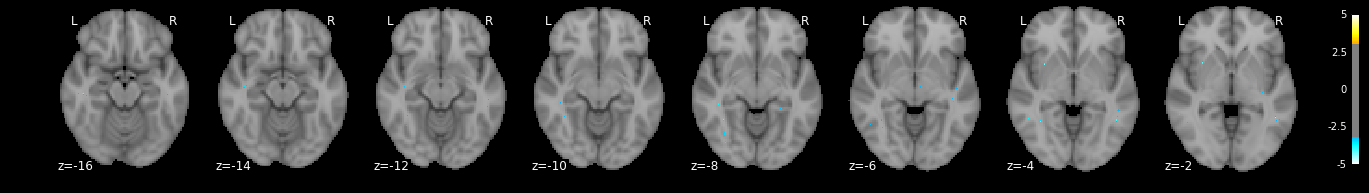

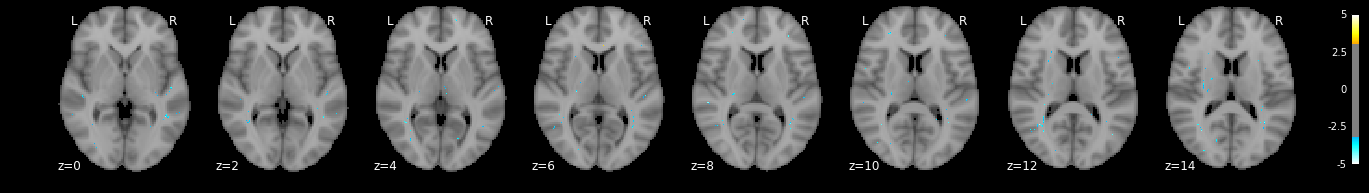

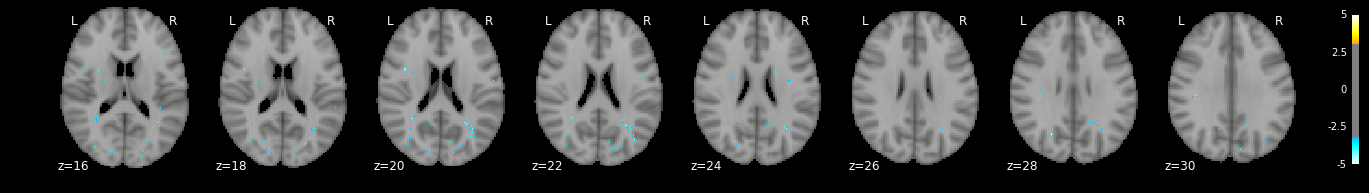

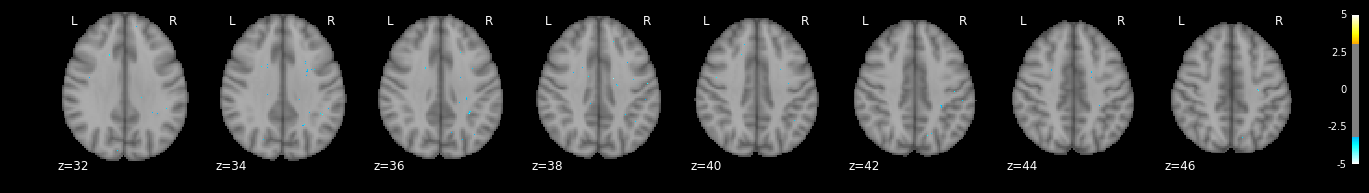

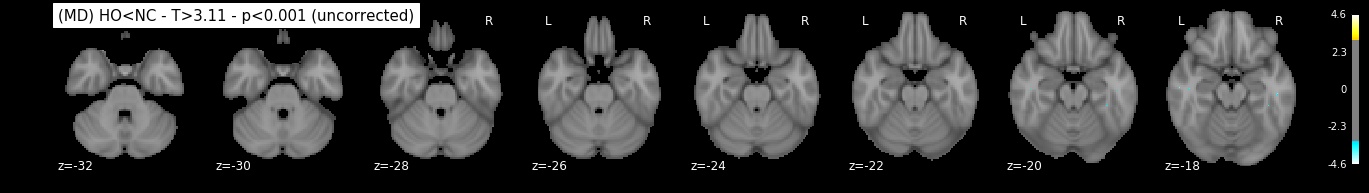

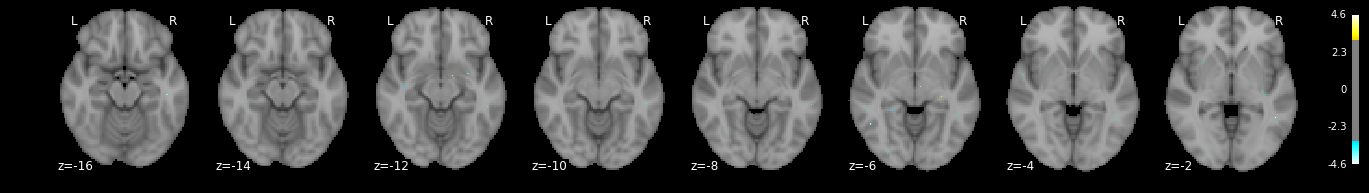

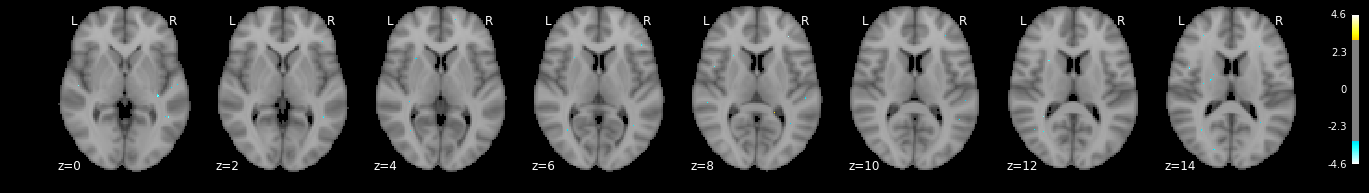

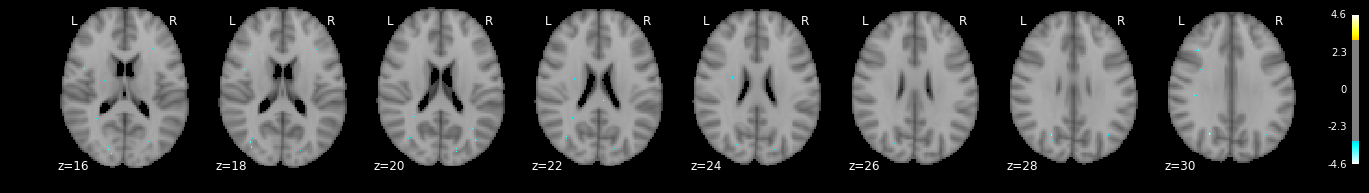

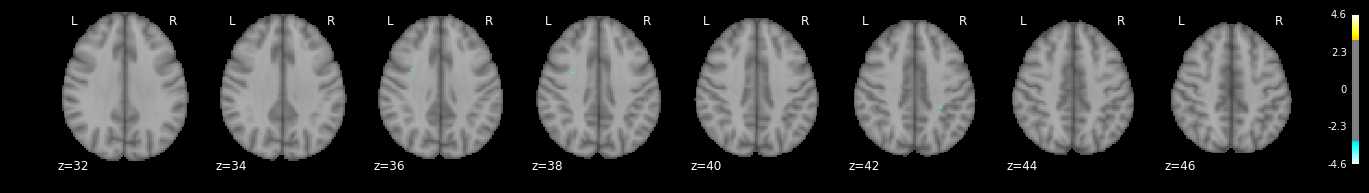

In [46]:
sections_allcontrasts(analysis_wd, 'MD', axis='z', contrasts=range(6,14,2))